In [1]:
import os
import scipy
import imageio
import numpy as np
import tensorflow as tf
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from tqdm import tqdm
import matplotlib.pyplot as plt
import PIL
import imghdr
from yolo_utils import read_classes, read_anchors, generate_colors, preprocess_image, draw_boxes, scale_boxes

Using TensorFlow backend.


In [2]:
def get_YOLO_boxing(File_name, original_x, original_y, nx, ny):
    
    bb_list = []
    with open(File_name) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
            bb_list.append(row)

    bb_list.pop(0)

    image_id = {} 
    for j in range(1,9767):
        image_id[j] = np.array([0,0,0,0,0])

    for i in range(len(bb_list)):
        for j in range(len(bb_list[i])):
            #print(bb_list[i][j])
            bb_list[i][j] = float(bb_list[i][j])
            bb_list[i][0] = int(bb_list[i][0])
            
    for idy in tqdm(image_id.keys()):
        num = []
        for image in bb_list:
            if image[0] == idy:
                xc = image[1]+image[3]/2
                yc = image[2]+image[4]/2
                wc = image[3]
                hc = image[4]
                x = xc*nx/original_x - int(xc*nx/original_x)
                y = yc*ny/original_y - int(yc*ny/original_y)
                w = wc / (original_x/nx)
                h = hc / (original_y/ny)
                num.append(np.array([1, x,y,w,h]))
                image_id[idy]= num

    return image_id

In [3]:
my_dict = get_YOLO_boxing("./bounding_boxes.csv", 720, 480, 15,10)


100%|█████████████████████████████████████████████████████████████████████████████| 9766/9766 [00:11<00:00, 887.30it/s]


In [4]:
my_dict[11]

[array([1.        , 0.        , 0.34375   , 1.5625    , 1.54166667]),
 array([1.    , 0.3125, 0.8125, 0.4375, 0.4375])]

In [5]:
def bb_drawing(image_path, yolo_x, yolo_y, yolo_w, yolo_h, nx, ny, original_x, original_y):
    image = PIL.Image.open(image_path)
    # Generate colors for drawing bounding boxes.
    colors = [(255,0,0)]
    out_scores = [0.9]
    out_boxes = [[yolo_x*nx,yolo_y*ny,original_x,original_y]]
    out_classes = [0]
    class_names = ['rock']
    # Draw bounding boxes on the image file
    draw_boxes(image, out_scores, out_boxes, out_classes, class_names, colors)
    # Save the predicted bounding box on the image
    image.save(os.path.join("out", image_path), quality=90)
    # Display the results in the notebook
    output_image = imageio.imread(os.path.join("out", image_path))
    imshow(output_image)

rock 0.90 (45, 23) (86, 67)


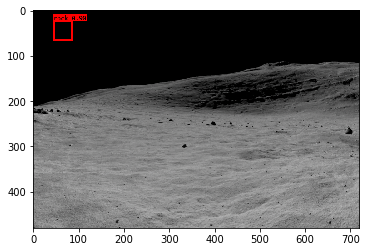

In [6]:
bb_drawing('./images/render0018.png',23,45,1,1,1,1,67,86)